
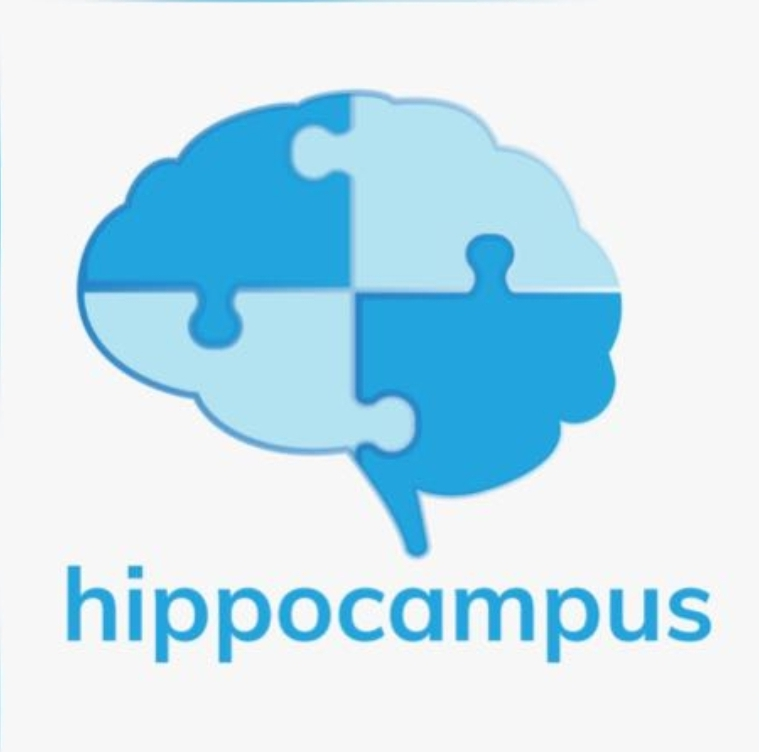

Disclaimer!

Hippocampus seeks to share its data from its system so the terms of use of this data set is that if you find something personally identifiable information you need to report that and you CANNOT use that information in anyway as per POPI ACT

# Load Import necessary dependencies

In [202]:
# LOADING NECESSARY LIBRARIES

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('whitegrid')
import datetime  as dt
import time  
import pdpipe as pdp #allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process
from typing import Tuple, List, Dict 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import glob 
import plotly.graph_objects as go 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline
import category_encoders as ce

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')




from plotly import tools

import plotly.offline as pyoff #not sure wat this does 
import plotly.graph_objs as go #this tooo lol 

from plotly.offline import init_notebook_mode, iplot

import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and Read DataSets

In [186]:
read_file = pd.read_excel ("proportion.xlsx")

In [187]:
read_file.to_csv ("proportion.csv", 
                  index = None,
                  header=True)

In [188]:
data = pd.DataFrame(pd.read_csv("proportion.csv"))

data

,student_ID,items_learned_per_hour,proportion_correct,proportion_explain,hours,time_in_hours,correct,explain,chemistry_outcome,Methods_used_PerQuestion
0,2425844,9,7,0,43,00:43:00,0.77,0.00,pass,first attempt
1,2466429,29,17,3,218,03:41:30,0.58,0.17,pass,view solution
2,2487231,38,19,7,288,04:48:00,0.50,0.43,pass,video&Textbook
3,2489211,16,7,3,02d21h05,69:48:05,0.43,0.00,fail,view solution
4,2455304,19,13,0,68,01:08:10,0.68,0.00,pass,video&Textbook
5,1849534,11,7,0,61,01:01:08,0.64,0.00,pass,video&Textbook
6,2483688,16,9,3,94,01:34:00,0.56,0.18,pass,view solution
7,2328014,15,5,4,73,01:13:40,0.33,0.27,fail,video&Textbook
8,2431095,27,16,2,204,03:24:00,0.59,0.07,pass,video&Textbook
9,2483953,6,3,1,9,00:09:00,0.50,0.17,pass,video&Textbook


# ATTRIBUTES


**STudent_ID : 

**CORRECT : The number of problems the student had answered correctly in Assesment prior to this assignment.**
**PROPORTION CORRECT (prior_correct/ITEMS learnt per hour). The percent of assesment problems the student got correct.**



**Proportion explain**

# DataSets Describe


In [189]:
data.describe()

,student_ID,items_learned_per_hour,proportion_correct,proportion_explain,correct,explain
count,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.325032e+06,17.600000,9.066667,2.933333,0.530000,0.166667
std,2.597770e+05,9.567803,5.035115,2.814926,0.167375,0.154766
min,1.603806e+06,6.000000,2.000000,0.000000,0.280000,0.000000
25%,2.292182e+06,10.000000,6.500000,0.500000,0.405000,0.000000
50%,2.431095e+06,16.000000,7.000000,3.000000,0.560000,0.170000
75%,2.475058e+06,23.000000,11.000000,3.500000,0.615000,0.270000
max,2.489211e+06,38.000000,19.000000,10.000000,0.850000,0.430000


# Check DataSets Shape


In [190]:
print(data.shape)

(15, 10)


In [191]:
data.columns

Index(['student_ID', 'items_learned_per_hour ', 'proportion_correct',
       'proportion_explain', ' hours', 'time_in_hours', 'correct', 'explain',
       'chemistry_outcome', 'Methods_used_PerQuestion'],
      dtype='object')

In [192]:
#check missing data
data.isnull().sum()

student_ID                  0
items_learned_per_hour      0
proportion_correct          0
proportion_explain          0
 hours                      0
time_in_hours               0
correct                     0
explain                     0
chemistry_outcome           0
Methods_used_PerQuestion    0
dtype: int64

# CHECK CORRECT Value Counts & Percentage In Dataset

In [194]:
data['correct'].value_counts()

0.50    2
0.56    2
0.77    1
0.58    1
0.43    1
0.68    1
0.64    1
0.33    1
0.59    1
0.30    1
0.28    1
0.38    1
0.85    1
Name: correct, dtype: int64

percentage 0.50    0.133333
0.56    0.133333
0.77    0.066667
0.58    0.066667
0.43    0.066667
0.68    0.066667
0.64    0.066667
0.33    0.066667
0.59    0.066667
0.30    0.066667
0.28    0.066667
0.38    0.066667
0.85    0.066667
Name: correct, dtype: float64


<AxesSubplot:>

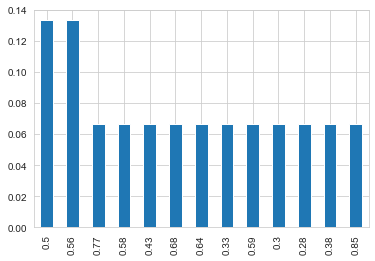

In [195]:
print('percentage',data.correct.value_counts(normalize=True))
data.correct.value_counts(normalize=True).plot(kind='bar')

In [196]:
#explain 

data['explain'].value_counts()






0.00    5
0.17    2
0.43    2
0.18    2
0.27    2
0.07    1
0.33    1
Name: explain, dtype: int64

percentage 0.00    0.333333
0.17    0.133333
0.43    0.133333
0.18    0.133333
0.27    0.133333
0.07    0.066667
0.33    0.066667
Name: explain, dtype: float64


<AxesSubplot:>

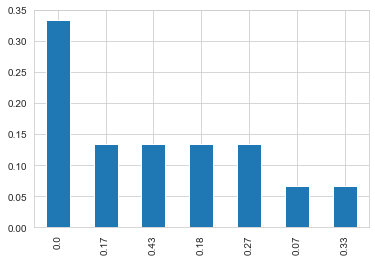

In [197]:
print('percentage',data.explain.value_counts(normalize=True))
data.explain.value_counts(normalize=True).plot(kind='bar')

In [198]:
#student value counts &percentage in dataset
data['student_ID'].value_counts()

2425844    1
2466429    1
2487231    1
2489211    1
2455304    1
1849534    1
2483688    1
2328014    1
2431095    1
2483953    1
2256349    1
2242332    1
1603806    1
2429308    1
2443377    1
Name: student_ID, dtype: int64

percentage 2425844    0.066667
2466429    0.066667
2487231    0.066667
2489211    0.066667
2455304    0.066667
1849534    0.066667
2483688    0.066667
2328014    0.066667
2431095    0.066667
2483953    0.066667
2256349    0.066667
2242332    0.066667
1603806    0.066667
2429308    0.066667
2443377    0.066667
Name: student_ID, dtype: float64


<AxesSubplot:>

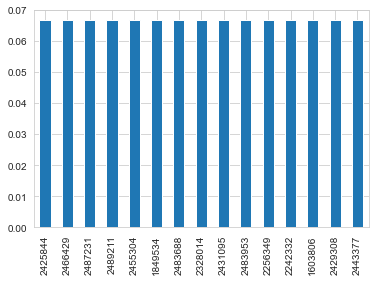

In [170]:
print('percentage',data.student_ID.value_counts(normalize=True))
data.student_ID.value_counts(normalize=True).plot(kind='bar')

PROPORTION CORRECT VALUE COUNT&PERCENTAGES

In [171]:
#PROPORTION CORRECT value counts &percentage in dataset
data['proportion_correct'].value_counts()

7     4
9     3
17    1
19    1
13    1
5     1
16    1
3     1
2     1
6     1
Name: proportion_correct, dtype: int64

Percentage 7     0.266667
9     0.200000
17    0.066667
19    0.066667
13    0.066667
5     0.066667
16    0.066667
3     0.066667
2     0.066667
6     0.066667
Name: proportion_correct, dtype: float64


<AxesSubplot:>

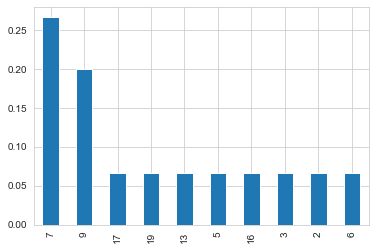

In [172]:
print('Percentage',data.proportion_correct.value_counts(normalize=True))
data.proportion_correct.value_counts(normalize=True).plot(kind='bar')

ITEMS LEARNED PER HOUR VALUE COUNTS &PERCENTAGE

In [173]:
data['time_in_hours'].value_counts()

 00:43:00     1
  03:41:30    1
 04:48:00     1
 69:48:05     1
  01:08:10    1
01:01:08      1
  01:34:00    1
01:13:40      1
03:24:00      1
  00:09:00    1
  03:40:01    1
  00:11:00    1
00:45:00      1
 10:56:10     1
  01:11:00    1
Name: time_in_hours, dtype: int64

In [174]:
data['proportion_correct'].value_counts()

7     4
9     3
17    1
19    1
13    1
5     1
16    1
3     1
2     1
6     1
Name: proportion_correct, dtype: int64

Percentage 7     0.266667
9     0.200000
17    0.066667
19    0.066667
13    0.066667
5     0.066667
16    0.066667
3     0.066667
2     0.066667
6     0.066667
Name: proportion_correct, dtype: float64


<AxesSubplot:>

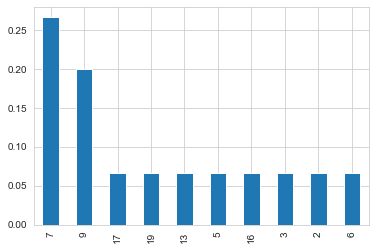

In [175]:
print('Percentage',data.proportion_correct.value_counts(normalize=True))
data.proportion_correct.value_counts(normalize=True).plot(kind='bar')

PRoportion explain  value counts & percentage in dataset

In [176]:
data['proportion_explain'].value_counts()

3     5
0     4
7     1
4     1
2     1
1     1
10    1
5     1
Name: proportion_explain, dtype: int64

Percentage 3     0.333333
0     0.266667
7     0.066667
4     0.066667
2     0.066667
1     0.066667
10    0.066667
5     0.066667
Name: proportion_explain, dtype: float64


<AxesSubplot:>

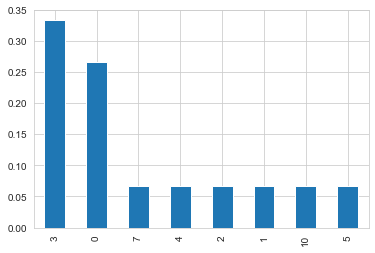

In [177]:
print('Percentage',data.proportion_explain.value_counts(normalize=True))
data.proportion_explain.value_counts(normalize=True).plot(kind='bar')

time in hours value count & percentage 

In [180]:
data['time_in_hours'].value_counts()

 00:43:00     1
  03:41:30    1
 04:48:00     1
 69:48:05     1
  01:08:10    1
01:01:08      1
  01:34:00    1
01:13:40      1
03:24:00      1
  00:09:00    1
  03:40:01    1
  00:11:00    1
00:45:00      1
 10:56:10     1
  01:11:00    1
Name: time_in_hours, dtype: int64

Percentage  00:43:00     0.066667
  03:41:30    0.066667
 04:48:00     0.066667
 69:48:05     0.066667
  01:08:10    0.066667
01:01:08      0.066667
  01:34:00    0.066667
01:13:40      0.066667
03:24:00      0.066667
  00:09:00    0.066667
  03:40:01    0.066667
  00:11:00    0.066667
00:45:00      0.066667
 10:56:10     0.066667
  01:11:00    0.066667
Name: time_in_hours, dtype: float64


<AxesSubplot:>

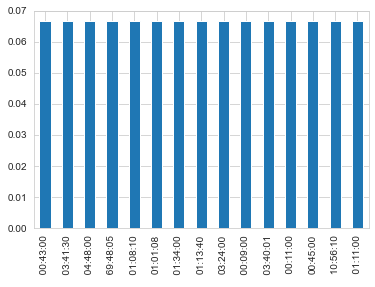

In [181]:
print('Percentage',data.time_in_hours.value_counts(normalize=True))
data.time_in_hours.value_counts(normalize=True).plot(kind='bar')

In [182]:
data['chemistry_outcome'].value_counts()

pass    9
fail    6
Name: chemistry_outcome, dtype: int64

Percentage pass    0.6
fail    0.4
Name: chemistry_outcome, dtype: float64


<AxesSubplot:>

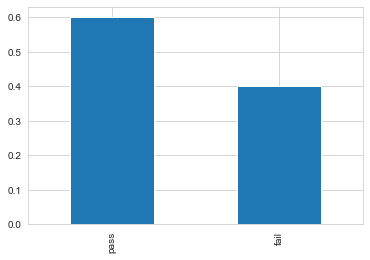

In [184]:
print('Percentage',data.chemistry_outcome.value_counts(normalize=True))
data.chemistry_outcome.value_counts(normalize=True).plot(kind='bar')

In [200]:
data['Methods_used_PerQuestion'].value_counts()

video&Textbook    9
view solution     5
first attempt     1
Name: Methods_used_PerQuestion, dtype: int64

Percentage video&Textbook    0.600000
view solution     0.333333
first attempt     0.066667
Name: Methods_used_PerQuestion, dtype: float64


<AxesSubplot:>

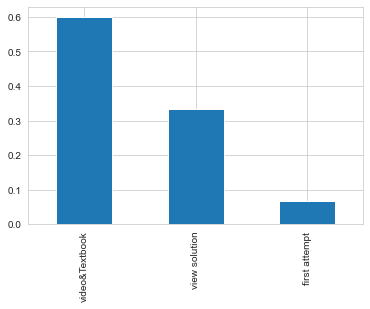

In [201]:
print('Percentage',data.Methods_used_PerQuestion.value_counts(normalize=True))
data.Methods_used_PerQuestion.value_counts(normalize=True).plot(kind='bar')

In [183]:
#print('Parcentage',df.PROPORTION EXPLAIN.value_counts(normalize=True))
#df.proportion_explain.value_counts(normalize=True).plot(kind='bar')
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": data["proportion_explain"].value_counts().values,
      "labels": data["proportion_explain"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "Proportin explain Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"proportion explain Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "proportion explain Parcentage",
                "x": 0.47,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')





    Students who view videos, textook and view solution seem to have performed better
      



# I'll start with visualizing just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what I can deduce from that

<AxesSubplot:xlabel='proportion_correct', ylabel='count'>

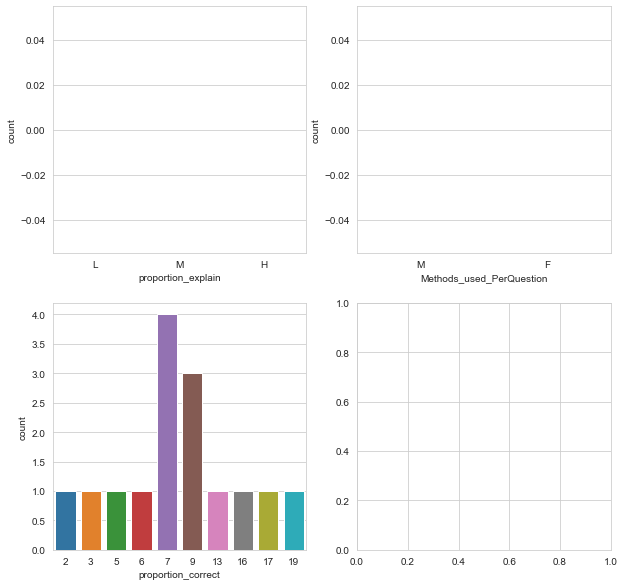

In [203]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='proportion_explain', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='Methods_used_PerQuestion', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='proportion_correct', data=data, ax=axarr[1,0])


<AxesSubplot:xlabel='Methods_used_PerQuestion', ylabel='count'>

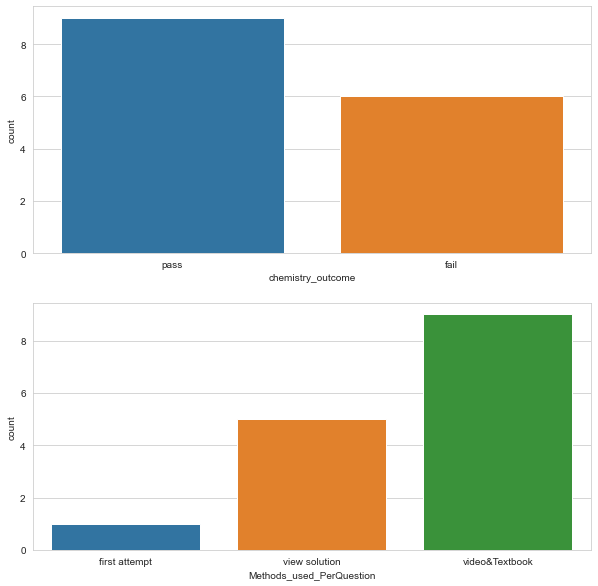

In [204]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='chemistry_outcome', data=data, ax=axis1)
sns.countplot(x='Methods_used_PerQuestion', data=data, ax=axis2)

# Next I will look at some categorical features in relation to each other, to see what insights that could possibly read